# Example using Lorentzian model and scipy.optimize

<a id='Table of Contents'></a><h1>Table of Contents</h1>

- <a href='#introduction'>Introduction</a>  
- <a href='#imports'>Importing libraries</a>
- <a href='#anim_plot'>Plot of the fitting model</a>
- <a href='#ref_data'>Creating reference data</a>
- <a href='#fitting'>Setting and fitting</a>
- <a href='#plot'>Plotting the results</a>  

(<a href='#Table of Contents'>Top</a>)<a id='introduction'></a><h2>Introduction</h2>
<div class="alert alert-block alert-info">
The objective of this notebook is to show how to use one of the models of 
the <a href="https://github.com/QENSlibrary/QENSmodels">QENSlibrary</a>, <b>Lorentzian</b>, to perform some fits. 

<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html">scipy.optimize.curve_fit</a> is used for fitting.
</div>

### Physical units
Please note that the following units are used for the QENS models

| Type of parameter | Unit          |
| ----------------- |---------------|
| Time              | picosecond    |
| Length            | Angstrom      |
| Momentum transfer | 1/Angstrom    |

(<a href='#Table of Contents'>Top</a>)<a id='imports'></a><h2>Importing libraries</h2>

In [1]:
# install QENSmodels (if not already installed)
import pkgutil
if not pkgutil.find_loader("QENSmodels"):
    !{sys.executable} -m pip install git+https://github.com/QENSlibrary/QENSmodels#egg=QENSmodels

In [2]:
# import python modules for plotting, fitting
from __future__ import print_function
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# for interactive plot
import ipywidgets

# import model from QENS library
import QENSmodels

(<a href='#Table of Contents'>Top</a>)<a id='anim_plot'></a><h2>Plot of the fitting model</h2>

The widget below shows the lorentzian peak shape function imported from QENSmodels where the function's parameters *Scale*, *Center* and *FWHM* can be varied.

In [3]:
xx = np.linspace(-10,10,100)

def interactive_plot(scale, center, hwhm):
    plt.plot(xx, QENSmodels.lorentzian(xx, float(scale), float(center), float(hwhm)))
    plt.ylabel('lorentzian(x,{scale},{center},{hwhm})'.
               format(scale=scale, center=center, hwhm=hwhm))
    plt.xlabel('x')
    plt.grid()
    plt.show()

interactive_plot = ipywidgets.interactive(interactive_plot, 
                                          scale=(1, 10), 
                                          center=(0, 10), 
                                          hwhm=(1, 5))

def reset_values(b):
    """Reset the interactive plots to inital values."""
    interactive_plot.children[0].value = 5
    interactive_plot.children[1].value = 5
    interactive_plot.children[2].value = 3

reset_button = ipywidgets.Button(description = "Reset")
reset_button.on_click(reset_values)

output = interactive_plot.children[-1]
output.layout.height = '270px'
display(interactive_plot, reset_button)

interactive(children=(IntSlider(value=5, description='scale', max=10, min=1), IntSlider(value=5, description='…

Button(description='Reset', style=ButtonStyle())

(<a href='#Table of Contents'>Top</a>)<a id='ref_data'></a><h2>Creating reference data</h2>

**Input:** the reference data for this simple example correspond to a Lorentzian with added noise.

The fit is performed using `scipy.optimize.curve_fit`. <br> The example is based on implementations from https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

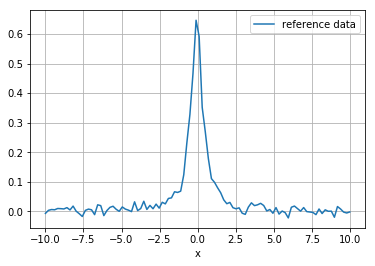

In [4]:
# Creation of reference data
lorentzian_noisy = QENSmodels.lorentzian(xx, 0.89, -0.025, 0.45)*(1. + 0.1*np.random.normal(0,1,100)) + 0.01*np.random.normal(0,1,100)

plt.plot(xx, lorentzian_noisy, label='reference data')
plt.xlabel('x')
plt.grid()
plt.legend()
plt.show()

(<a href='#Table of Contents'>Top</a>)<a id='fitting'></a><h2>Setting and fitting</h2>

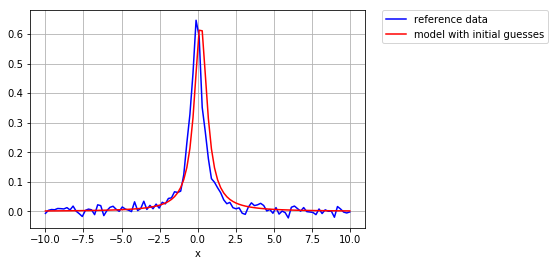

In [5]:
# From https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# perform fit with initial guesses scale=1, center=0.2 HWHM=0.5
initial_parameters_values = [1, 0.2, 0.5]

plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, QENSmodels.lorentzian(xx, *initial_parameters_values), 'r-', label='model with initial guesses')
plt.xlabel('x')
plt.grid()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

popt, pcov = curve_fit(QENSmodels.lorentzian, xx, lorentzian_noisy, p0=initial_parameters_values)

(<a href='#Table of Contents'>Top</a>)<a id='plot'></a><h2>Plotting the results</h2>

Values of refined parameters:
scale: 0.9046451490971851 +/- 0.013508238054434081
center : -0.0524553965459402 +/- 0.00667590221416922
HWHM 0.44711628664578934 +/- 0.009441501582430963


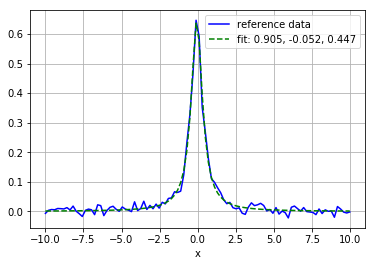

In [6]:
# Calculation of the errors on the refined parameters:
perr = np.sqrt(np.diag(pcov))

print('Values of refined parameters:')
print('scale:', popt[0],'+/-', perr[0])
print('center :', popt[1],'+/-', perr[1])
print('HWHM', popt[2],'+/-', perr[2])

# Comparison of reference data with fitting result
plt.plot(xx, lorentzian_noisy, 'b-', label='reference data')
plt.plot(xx, QENSmodels.lorentzian(xx, *popt), 'g--', label='fit: %5.3f, %5.3f, %5.3f' % tuple(popt))
plt.legend()
plt.xlabel('x')
plt.grid()
plt.show()